In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# These steps are typically always called. The "matplotlib inline" is to display figures in this notebook itself


import pandas as pd
# pandas is a library for handling datasets; you will see some useful built-in functions in action

import os # to move around your operating system

import scipy as sp # scientific computation library

from mpl_toolkits.mplot3d import axes3d # in case we need to plot in 3D z=f(x,y)
import seaborn as sns # another package for pretty graphs

# Scikit-learn (sklearn) is a powerful and fairly comprehensive library of ML algorithms

from sklearn import datasets
from sklearn.neighbors.kde import KernelDensity

In [3]:
'''
in: Xmat 1*N
out: X add a column of ones to N*2 matrix, N*3
'''
def designmat1(Xmat): # Xmat 2*N times, N:numbers of datasets
    print('Xmat',Xmat.shape) #50
    #(1) assemble each input vector as a row 
    X = np.atleast_2d(Xmat).T  #to 2d array then transpose, N*2
    #(2) add a column of ones to N*2 matrix
    col1 = np.ones(np.shape(X)[0]).reshape(np.shape(X)[0],1) #the column vector which consists of n ones
    # reshapte refers to ravel a array, this convert to N*1
    X = np.concatenate((col1, X), axis=1) #Join a sequence of arrays:X along an existing axis.
    n,p=X.shape
    print('X',n,p)
#     print('X=',X)
    return X

In [4]:
for i in range(5):
 print(i)

0
1
2
3
4


(50,)
y0 (50,)


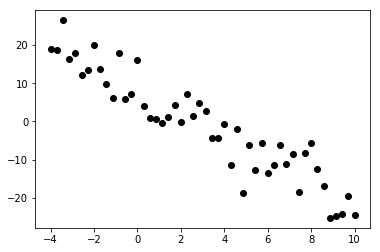

In [5]:
def f1(x, m, c): # y = m*x + c (ground truth function)
    return m*x + c 
xmin, xmax, npts = [-4, 10, 50] #三个参数依次为起始值,步长和数据个数
X = np.linspace(xmin, xmax, npts) # defining domain of the function as a vector of 50 real numbers between -4 and 50
#Return evenly spaced numbers over a specified interval-an array, npts is the size of the data
print(np.shape(X)) #50
#Create data from ground truth function that is corrupted by additive Gaussian noise of mean 0 and std. dev. 4
y0 = f1(X, -3., 9.) + np.random.normal(0,scale=4, size=np.shape(X))
#np.random.normal return random samples from a normal (Gaussian) distribution.(loc=0.0(mean), scale=1.0(std.dev.), size=None)
print('y0',y0.shape) #50
plt.scatter(X, y0, marker='o', c='k')  #draw 散点图

In [6]:
'''
in: Amat: n*2, y:n*1, w: 含有2个元素的一维数组(2*1)
out: 1 dimension array(2*1)
'''
def gradsqloss(Amat, y, w):  
    n, p = Amat.shape  # n rows, p columns actually n row 2 column 
    grad=(-2/n)*Amat.T.dot((y-Amat.dot(w))) ###  
    # partial derivatives for weight-wt
    #n,p=grad.shape #因为是一维数组，所以不存在p
#     print('grad',grad.shape)  #含有2个元素的一维数组
#     print('gradsqloss=',grad) 
    return grad

'''
in: Amat: N*2, y:N*1, 
winit: 含有2个元素的一维数组, rate:1*1, numiter: scalar
out: w: 含有2个元素的一维数组, whist:一维数组(1*n), array:一维数组(1*n)
'''
def gradientdescent(Amat, y, winit, rate, numiter):
    n, p = Amat.shape
    whistory = []
    meanrsshistory = [] 
    w = winit
    
    for i in range(numiter): #对每个rate进行numiter次数的迭代
        meanrss = np.square(y-Amat.dot(w)).mean() ###the average of squared residuals loss function
        if(i==1): print("meanrss",meanrss)
        whistory.append(w) #将每次计算的w都保存起来,#add vector w to list every time
        meanrsshistory.append(meanrss) #add vector meanrss to list every time
        grad = gradsqloss(Amat, y, w) #the gradient 
        w = w - rate*grad ###
    whist = np.asarray(whistory) #将每次计算的w都保存到list，再将list转化为数组, n*2
    print(whist.shape) #70*2
    meanlosstrace = np.asarray(meanrsshistory) #将每次计算的meanrss都保存起来，一维数组:1*n
    print("meanlosstrace",meanlosstrace.shape) #70
    return w, whist, meanlosstrace #asarray:convert the input to an array

Xmat (50,)
X 50 2
w0 (2,)
r= 0.0001
meanrss 164.1886960930749
(70, 2)
meanlosstrace (70,)
r= 0.001
meanrss 153.78052204582386
(70, 2)
meanlosstrace (70,)
r= 0.005
meanrss 113.63234588395628
(70, 2)
meanlosstrace (70,)
r= 0.01
meanrss 77.47604824112015
(70, 2)
meanlosstrace (70,)
r= 0.02
meanrss 51.92652815377568
(70, 2)
meanlosstrace (70,)


Text(0,0.5,'mean of sum of squares of residual')

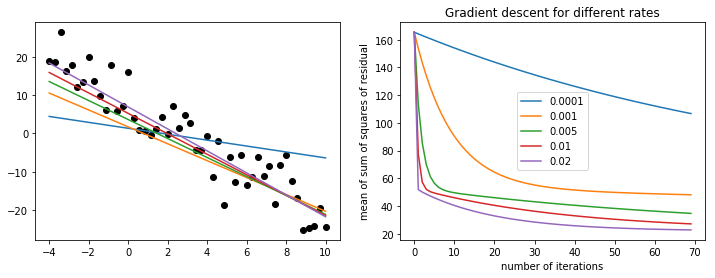

In [7]:
Xmat = designmat1(X)
n, p = Xmat.shape
#print(n,p)  50,2
w0 = np.random.randn(p) ###含有2个元素的一维数组 #return a sample (or samples)-array from the “standard normal” distribution(mean 0 and variance 1 ).
print('w0',w0.shape) #2
num_iters = 70
rates = [.0001,.001,.005,.01,.02,]  #原来试的比例 [.001,.005,.01,.02] 
xinput = np.linspace(-4,10,100) #给定输入数据集，用拟合后的系数画出新的图形
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4)) #画一行两列
ax[0].scatter(X,y0,marker='o',color='k')
for i, r in enumerate(rates): #对rates进行枚举，试不同的rate,调用四次gradientdescent ###i,必须得加,否则r不是一个数
    print("r=",r)
    wfin, whist, meanlosstrace = gradientdescent(Xmat, y0,  w0, r, num_iters)
    ax[1].plot(meanlosstrace,label=r)  #误差曲线
    ax[0].plot(xinput,wfin[0]+wfin[1]*xinput, label=r)  #拟合的曲线
ax[1].legend() 
ax[1].set_title("Gradient descent for different rates")
ax[1].set_xlabel("number of iterations")
ax[1].set_ylabel("mean of sum of squares of residual")